In [1]:
#install packages
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)


In [10]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"E:\DA-portfolio projects\DA Projects\2. Segment analysis of mall customers\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


univariate analysis:

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


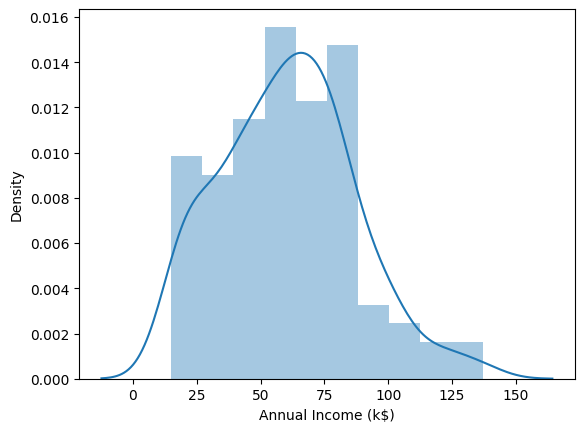

In [12]:
#note the mean and mode are very similar so we consider it to be a normal distribution
sns.distplot(df['Annual Income (k$)']);

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

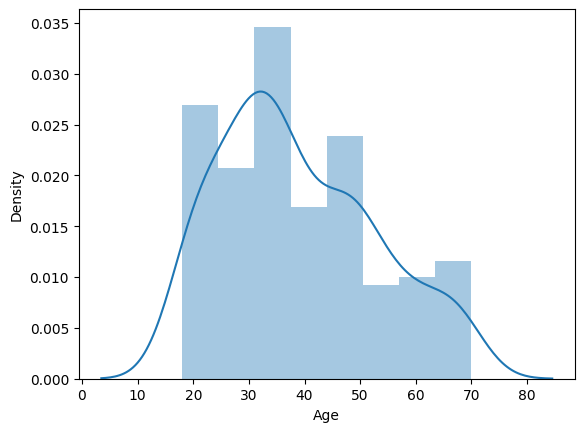

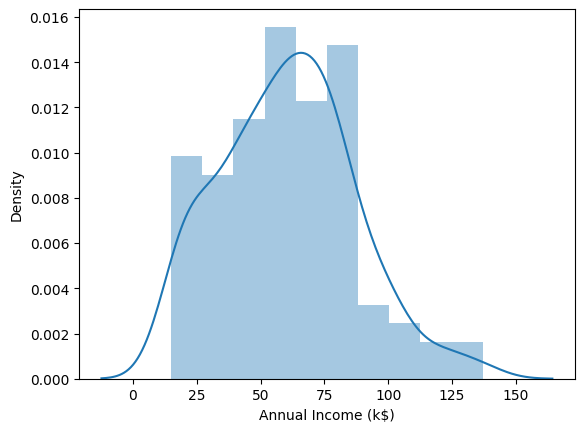

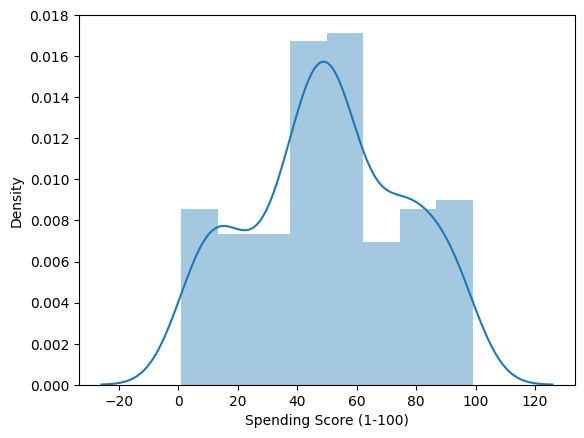

In [18]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]) #if you only run this you get all plots in 1 figure

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

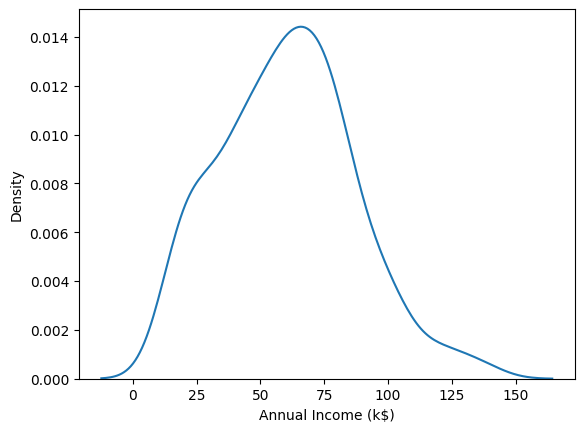

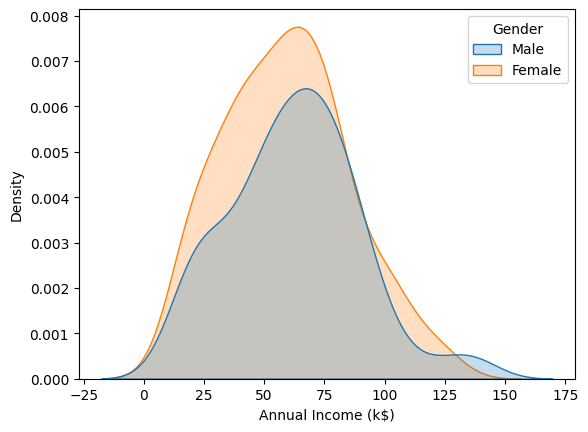

In [43]:
#different plots using kde plot
plt.figure()
sns.kdeplot(data=df,x='Annual Income (k$)')
plt.figure()
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)
#notice that the female portion is more frequent & there is an outlier in the male part
#since you can see a fat tail at the end

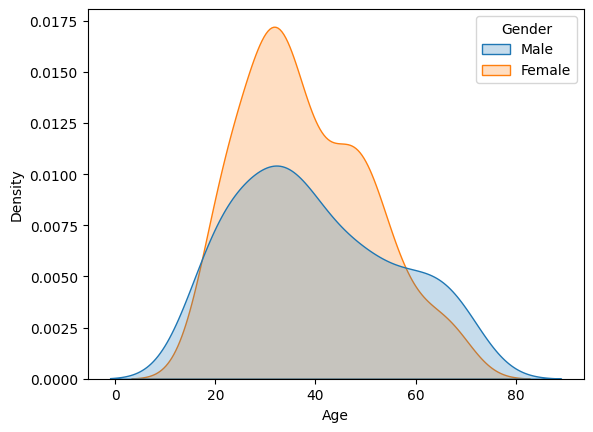

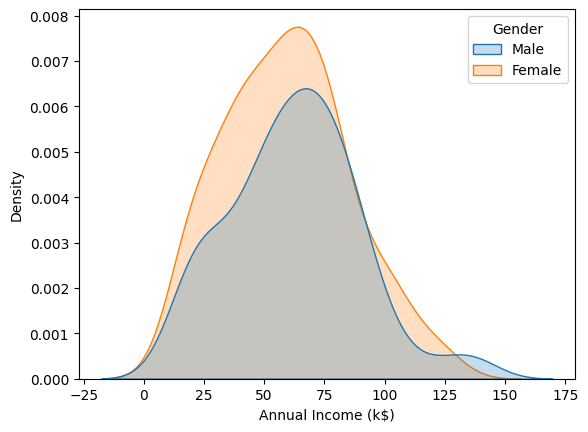

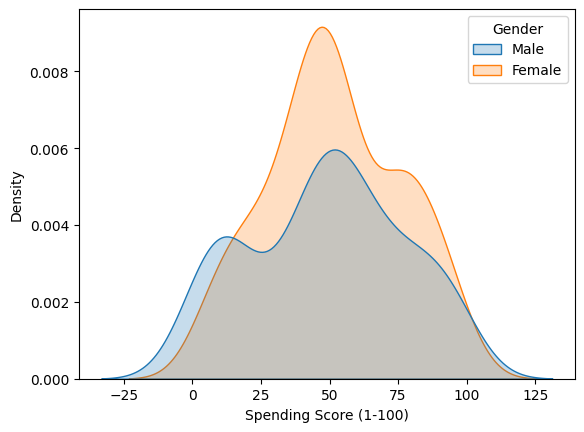

In [46]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)

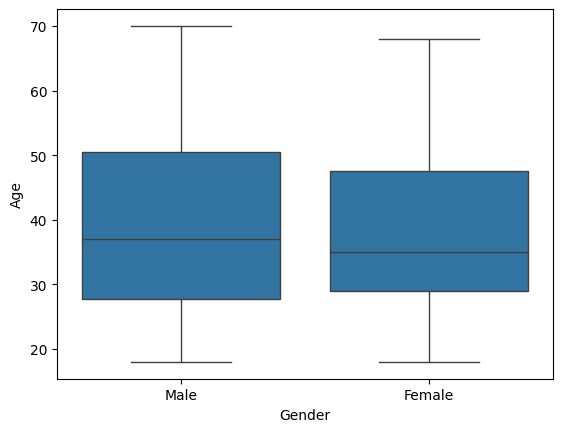

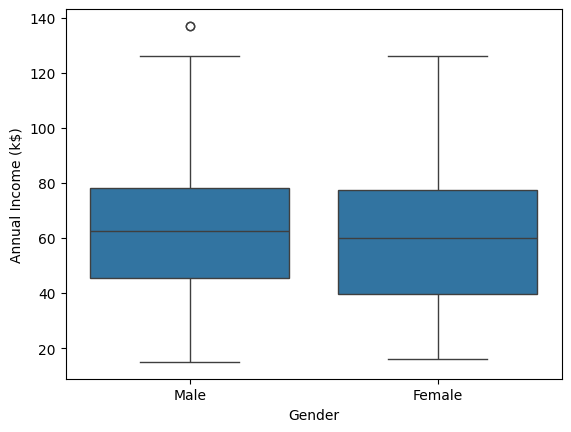

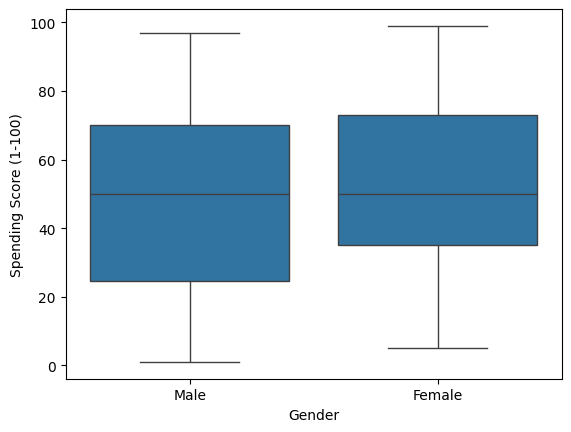

In [47]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [50]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

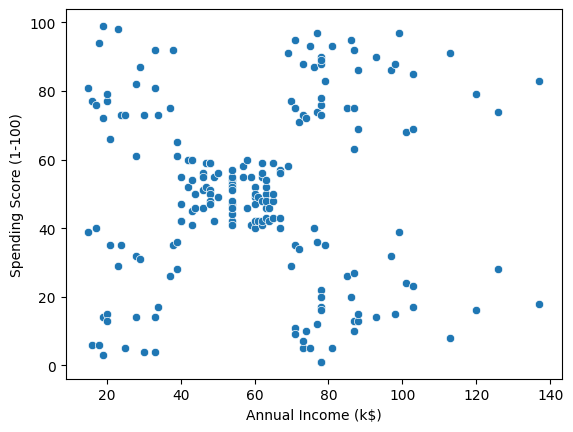

In [55]:
#usually we start with a scatter plot of two variables
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
#eyeballing it we see some clusters between thesse two vars
#if we cluster this it is called bivariate clustering

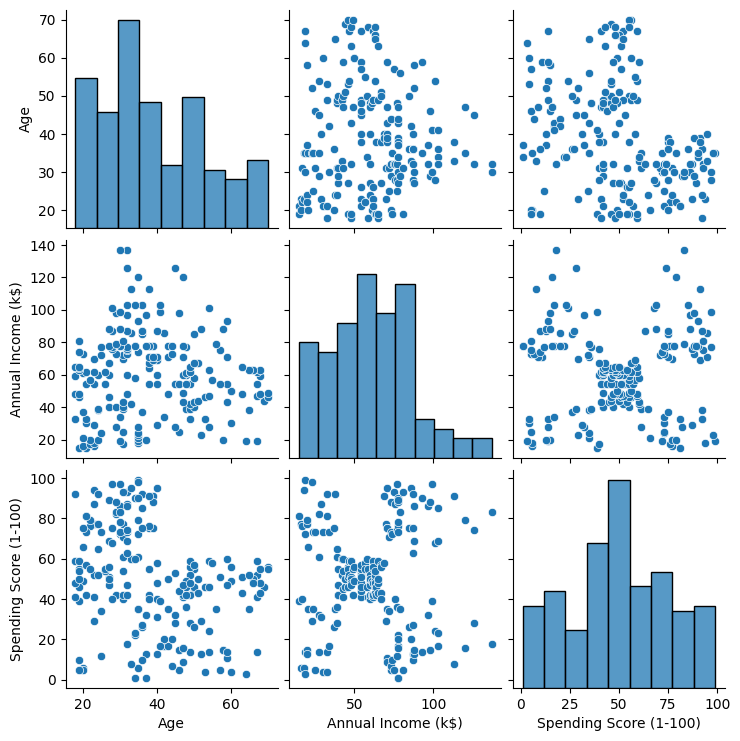

In [ ]:
#we drop the customerID because it has nothing to do during analysis
df=df.drop('CustomerID', axis=1) #axis=1 is column
#pairplot gives us all the scatter and some of the histograms together
sns.pairplot(data=df)
#the plots along the diagonal are the marginal plot(probab density vs that param); it is not param vs param
#all the other plots (i.e the scatter plots) are joint distribution plot (param1 vs param2)

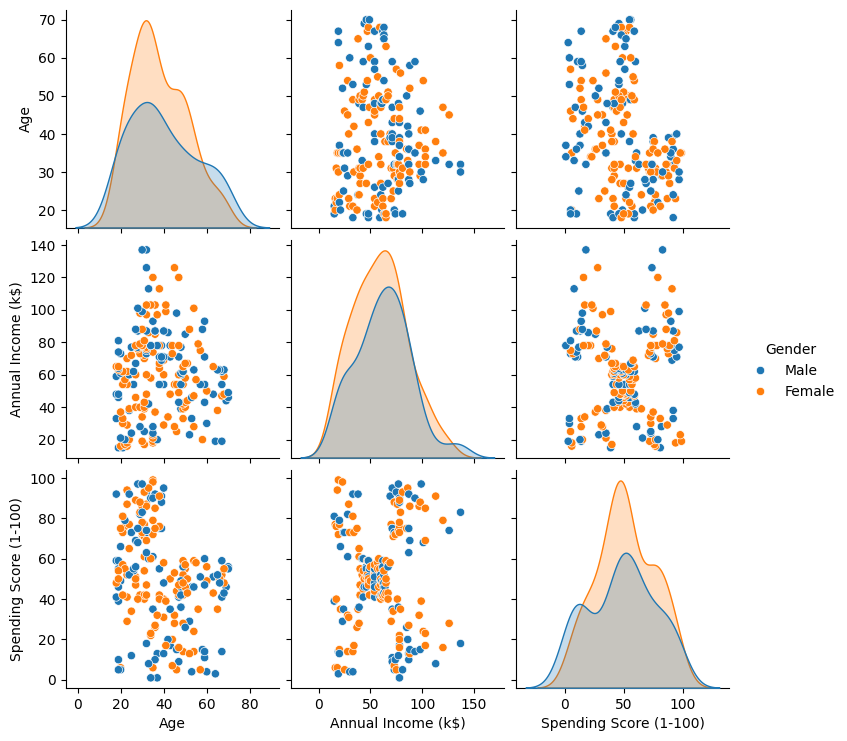

In [60]:
#you can also add gender as a hue and see the plots based on genders
sns.pairplot(data=df, hue='Gender')
#from this you can see that you cannot cluster based on gender

In [65]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [69]:
numeric_df=df.drop('Gender', axis=1)
# numeric_df.head()
numeric_df.corr()
#+ve corr between a and b means if a increases b also increases
#-ve means if a increases b decreases

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

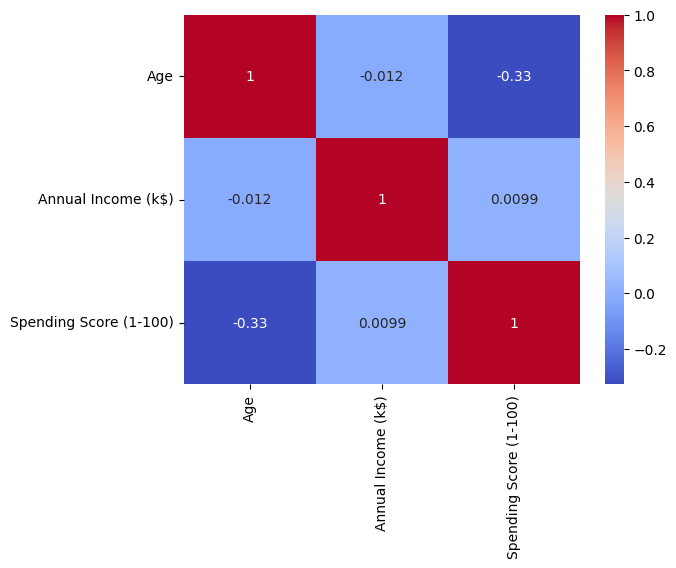

In [72]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

Clustering - Univariate, Bivariate and Multivariate

In [97]:
clustering1 = KMeans(n_clusters=3) #initiate
#initiate -> fit data to algo(algo learns) -> predict/grab labels out of fitted model
#by default it clusters into 8 clusters

In [98]:
clustering1.fit(df[['Annual Income (k$)']]) #fitted to your dataframe bsed on annual income

KMeans(n_clusters=3)

In [99]:
clustering1.labels_ #you can see the labels that was added to your input data by kmeans to cluster it

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [100]:
#the cluster labels have not been added to your original dataframe
#so you just create a new column called 'income Cluster' and add those labels for each rows
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [101]:
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

Step 1: Find the best suitable n_cluster and then aplly in the kmean part above
SUB: elbow method to get the optimal number of cluster:

In [92]:
#how do we find the sppropriate number of clusters?
#'elbow method' used here
clustering1.inertia_
#different number of clusteres would give different inertia values
#we need a high value

3505.380039525694

In [94]:
#we check inertia values for clusters from 1 to 10
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.28000000006,
 49761.73701298703,
 25341.285871863212,
 14647.235170393062,
 8481.49619047619,
 5811.503677672445,
 4146.0319709276255,
 2836.3399877899874,
 2369.3902470078947,
 1953.2809829059834]

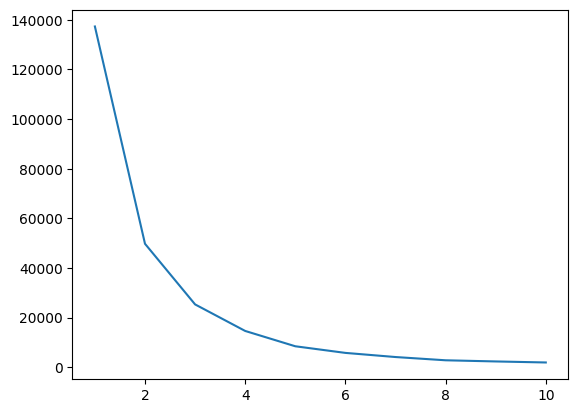

In [ ]:
plt.plot(range(1,11), inertia_scores)
#as we can see the elbow is at n_cluster=3, so use this is the above part

SUB: Analysis of after performing univarieate clustering using best possible n_cluster:

In [103]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [ ]:
####BIVARIATE CLUSTERING#####

In [110]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,2
2,Female,20,16,6,1,3
3,Female,23,16,77,1,2
4,Female,31,17,40,1,3


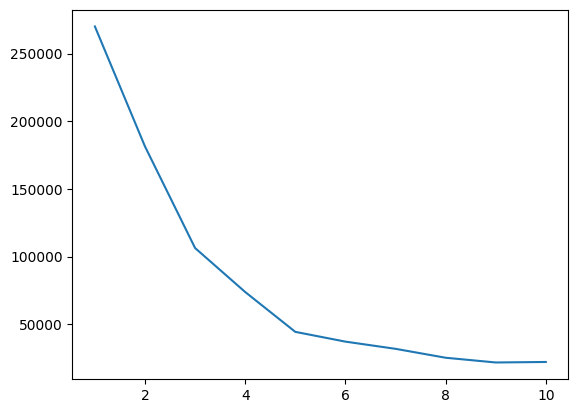

In [ ]:
#find the appropriate number of clusters
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)
#we find the elbow to be in 5, so use 5 in the above snippet fo best kmeans clustering

In [112]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

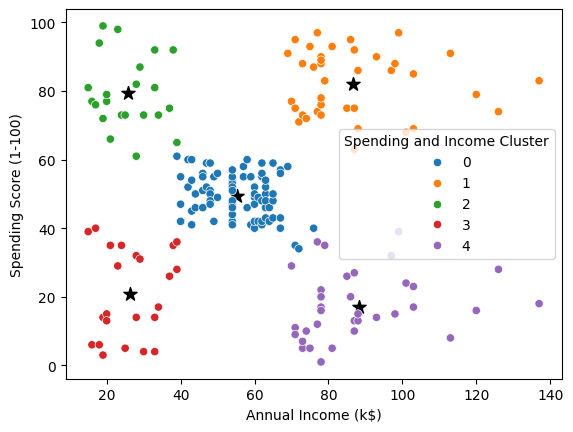

In [ ]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y'] #changing names of the columns
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
#NOTE: YOU scale the data for multivariate clustering, but for bivariate if the 
#clustering is not very good then you can scale 

In [ ]:
#from the above scatterplot the cluster that brings in the most spending power and
#annual income is cluster 1. THIS IS THE IDEAL CLUSTER FOR THE MALL'S CAMPAIGN!!

#also from the group by function above you find that the average age of cluster 1 is 32

#note that it is interesting that cluster 4 is high income but low spending power
#maybe they are coming for sale items or high value big ticket item that one will splurge on once
#like a PS, we need to dig in and get to know what kind of purchases this cluster 4 makes



In [ ]:
#check the gender distribution in each cluster
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize='index')

#cluster 1 consists of 53% female and 46% male

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [ ]:
######MULTIVARIETE CLUSTERING######

#we need to do preprocessing

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scale=StandardScaler()

In [ ]:
#in our datafram we dont need customerID (we had already dropped it), gender has to be turned into numbers
#using one hot encoding
#dff = pd.get_dummies(df) this generates 2 different clmns gender_female, gender_male
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,3,True
1,21,15,81,1,2,True
2,20,16,6,1,3,False
3,23,16,77,1,2,False
4,31,17,40,1,3,False


In [128]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [129]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [ ]:
dff = scale.fit_transform(dff) #this is not a dataframe
#converting to a dataframe
dff=pd.DataFrame(scale.fit_transform(dff))
dff
#you can change the labels but its not of any use

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


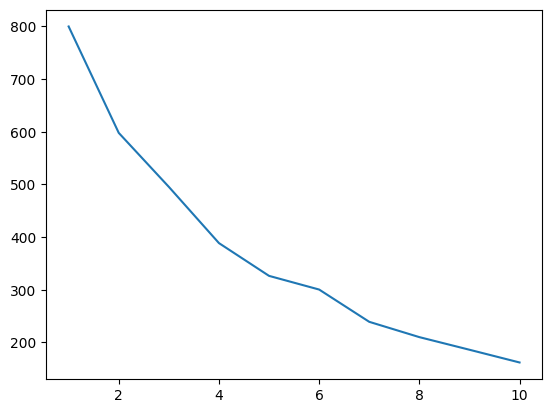

In [ ]:
#find the appropriate number of clusters
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)
#looks like 4 is the elbow

In [ ]:
#the bivariete clustering seems to be more telling than the multivariete
#so we report the cluster found using bivariete clustering